In [1]:
file = 'data/skyLines.txt'

In [2]:
%pylab inline
import scipy.interpolate

Populating the interactive namespace from numpy and matplotlib


In [56]:
wavelength = numpy.loadtxt(file,usecols=[0])
intensity = numpy.loadtxt(file,usecols=[1])

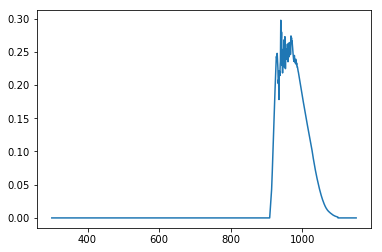

In [57]:
y_filter = 'data/throughputs/baseline/total_y.dat'
plt.plot(numpy.loadtxt(y_filter,usecols=[0]),numpy.loadtxt(y_filter,usecols=[1]),label = 'y')




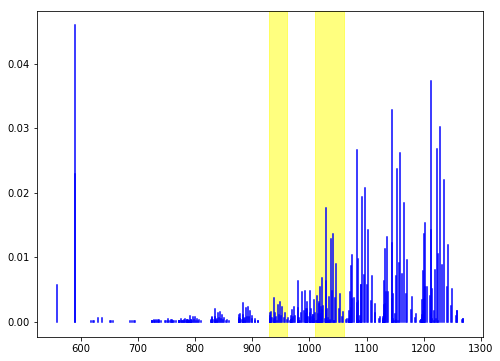

In [5]:
plt.figure(figsize = (8,6))
for i in range(len(wavelength)):
    plt.plot([wavelength[i],wavelength[i]], [0,intensity[i]/np.sum(intensity)],color = 'blue' )
plt.axvspan(1010,1060,color = 'yellow',alpha = 0.5)
plt.axvspan(930,960,color = 'yellow',alpha = 0.5)
#plt.axvspan(875,912,alpha = 0.5)

In [99]:
wavelength_mask = (wavelength > 929) & (wavelength < 961)
yband_range = np.round(wavelength[wavelength_mask],1)

In [100]:
yband_tt_wlen = np.round(numpy.loadtxt(y_filter,usecols=[0]),1)
yband_tt_throughput = numpy.loadtxt(y_filter,usecols=[1])

In [49]:
# y-band index in OH lines
# min_index:202
# max_index:524

In [60]:
yband_range = np.round(wavelength[np.where(intensity != 0)[0]],1)[202:524]
throughput_norm = yband_tt_throughput/np.sum(yband_tt_throughput)

In [65]:
len(yband_range)

322

In [69]:
wavelength[wavelength_mask].shape,yband_range.shape

((235,), (235,))

In [101]:

spec = []
for i in range(len(yband_range)):
    indx = np.where(yband_tt_wlen == yband_range[i])[0]
    actual = yband_tt_throughput[indx]*intensity[wavelength_mask][i]
    spec.append(actual[0])

In [117]:
spec = np.array(spec)
intensity_filter = spec >= 8

In [118]:
line_weight = spec[intensity_filter]/np.sum(spec[intensity_filter])

In [119]:
yband_range[intensity_filter]

array([937.9, 944.2, 947.9, 952.2])

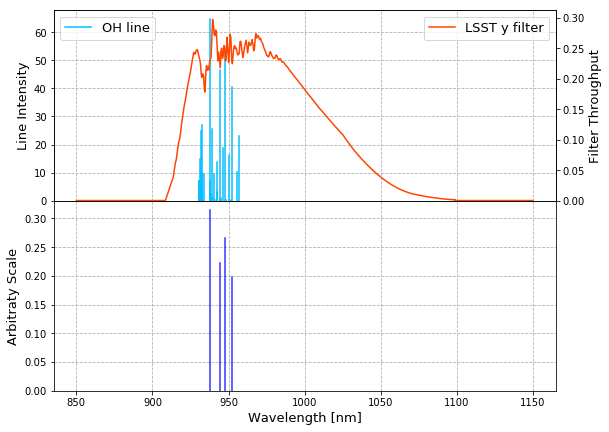

In [120]:

fig, ax1 = plt.subplots(nrows=2, figsize = (9,7),sharex=True)
plt.subplots_adjust(hspace=0,wspace=0)

ax2 = ax1[0].twinx()

for i in range(len(wavelength[wavelength_mask])):
    ax1[0].plot([wavelength[wavelength_mask][i],wavelength[wavelength_mask][i]], [0,intensity[wavelength_mask][i]], color = 'deepskyblue')
    if i == 0:
        ax1[0].plot([wavelength[wavelength_mask][i],wavelength[wavelength_mask][i]], [0,intensity[wavelength_mask][i]], color = 'deepskyblue',label = 'OH line')
ax1[0].legend(fontsize = 13,loc = 'upper left')
#ax1[0].axvspan(930,960,color = 'yellow',alpha = 0.5)
#ax1[1].axvspan(930,960,color = 'yellow',alpha = 0.5)


ax2.plot(numpy.loadtxt(y_filter,usecols=[0])[5500:],numpy.loadtxt(y_filter,usecols=[1])[5500:],color = 'orangered',label = 'LSST y filter')
ax2.legend(fontsize = 13)
#ax1[0].set_xlim(850,1150)
ax1[0].set_ylim(0,)
ax2.set_ylim(0,)
ax1[0].grid(ls='--')


ax1[1].set_xlabel('Wavelength [nm]',fontsize = 13)
ax1[0].set_ylabel('Line Intensity',fontsize = 13)
ax2.set_ylabel('Filter Throughput',fontsize= 13)

for i in range(len(yband_range[intensity_filter])):
    ax1[1].plot([yband_range[intensity_filter][i],yband_range[intensity_filter][i]], [0,line_weight[i]],color = 'blue',alpha = 0.8 ) 
    
#for i in range(len(yband_range)):
    #ax1[1].plot([yband_range[i],yband_range[i]], [0,spec[i]/np.sum(spec)],color = 'blue',alpha = 0.8 )   
ax1[1].set_ylim(0,)
ax1[1].set_ylabel('Arbitraty Scale',fontsize = 13)

ax1[1].grid(ls='--');

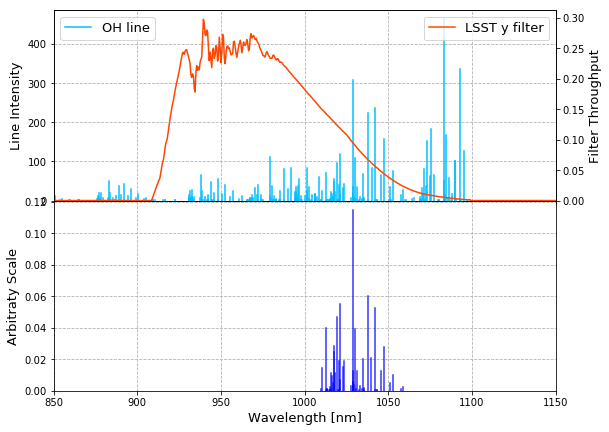

In [69]:

fig, ax1 = plt.subplots(nrows=2, figsize = (9,7),sharex=True)
plt.subplots_adjust(hspace=0,wspace=0)
MIN = 202
MAX = 524
ax2 = ax1[0].twinx()

for i in range(len(wavelength[MIN:MAX])):
    ax1[0].plot([wavelength[MIN:MAX][i],wavelength[MIN:MAX][i]], [0,intensity[MIN:MAX][i]], color = 'deepskyblue')
    if i == 0:
        ax1[0].plot([wavelength[MIN:MAX][i],wavelength[MIN:MAX][i]], [0,intensity[MIN:MAX][i]], color = 'deepskyblue',label = 'OH line')
ax1[0].legend(fontsize = 13,loc = 'upper left')
ax2.plot(numpy.loadtxt(y_filter,usecols=[0])[5000:],numpy.loadtxt(y_filter,usecols=[1])[5000:],color = 'orangered',label = 'LSST y filter')
ax2.legend(fontsize = 13)
ax1[0].set_xlim(850,1150)
ax1[0].set_ylim(0,)
ax2.set_ylim(0,)
ax1[0].grid(ls='--')

ax1[1].set_xlabel('Wavelength [nm]',fontsize = 13)
ax1[0].set_ylabel('Line Intensity',fontsize = 13)
ax2.set_ylabel('Filter Throughput',fontsize= 13)

for i in range(len(yband_range)):
    ax1[1].plot([yband_range[i],yband_range[i]], [0,spec[i]],color = 'blue',alpha = 0.8 )   
ax1[1].set_ylim(0,)
ax1[1].set_ylabel('Arbitraty Scale',fontsize = 13)

ax1[1].grid(ls='--');

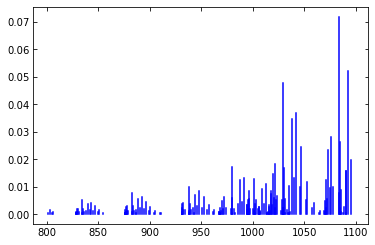

In [93]:
for i in range(len(wavelength[MIN:MAX])):
    plt.plot([wavelength[MIN:MAX][i],wavelength[MIN:MAX][i]], [0,intensity[MIN:MAX][i]/np.sum(intensity[MIN:MAX])],color = 'blue' )

In [35]:
numpy.loadtxt(y_filter,usecols=[0])

array([ 800. ,  800.1,  800.2, ..., 1149.8, 1149.9, 1150. ])

(0, 1062.0437644536803)

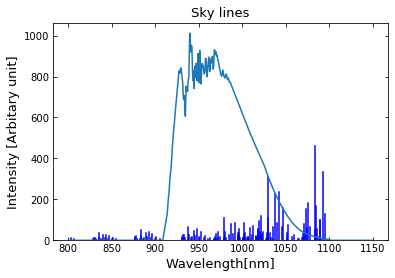

In [50]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

MIN = 202
MAX = 524
plt.figure(figsize = (6,4))
for i in range(len(wavelength[MIN:MAX])):
    plt.plot([wavelength[MIN:MAX][i],wavelength[MIN:MAX][i]], [0,intensity[MIN:MAX][i]],color = 'blue' )
plt.title('Sky lines',fontsize = 13)
plt.xlabel('Wavelength[nm]',fontsize = 13)
plt.ylabel('Intensity [Arbitary unit]',fontsize = 13)
#plt.xlim(960,990)
#plt.axvspan(978.5,982,alpha = 0.5,color = 'yellow')
plt.plot(numpy.loadtxt(y_filter,usecols=[0])[5000:],numpy.loadtxt(y_filter,usecols=[1])[5000:]*3400,label = 'y')
plt.ylim(0)

In [28]:
f = scipy.interpolate.interp1d(numpy.loadtxt(y_filter,usecols=[0])[5000:], numpy.loadtxt(y_filter,usecols=[1])[5000:], kind='cubic')

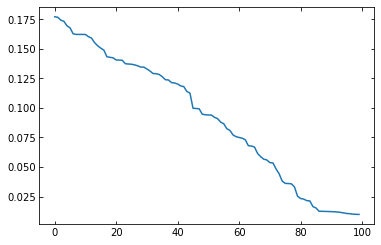

In [30]:
plt.plot(f(wavelength[400:500]))

(0, 115.71000000000001)

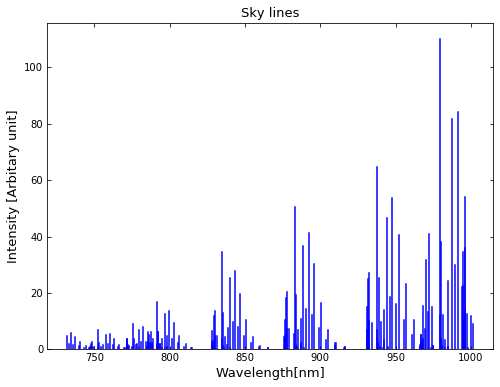

In [38]:
MIN = 100
MAX = 400
plt.figure(figsize = (8,6))
for i in range(len(wavelength[MIN:MAX])):
    plt.plot([wavelength[MIN:MAX][i],wavelength[MIN:MAX][i]], [0,intensity[MIN:MAX][i]],color = 'blue' )
plt.title('Sky lines',fontsize = 13)
plt.xlabel('Wavelength[nm]',fontsize = 13)
plt.ylabel('Intensity [Arbitary unit]',fontsize = 13)



plt.ylim(0)